In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
#hide warnings
import warnings
warnings.filterwarnings('ignore')

#### Data processing

In [2]:
# clean and prepare data
df = pd.read_csv('AMI_GSE66360_series_matrix.csv', skiprows=58, encoding='utf-8', low_memory=False)

# convert to numpy array
np_df = df.to_numpy()
np_df = np_df.T

# change dataframe to fit our convention, first row is the labels and the rest is the data
df = pd.DataFrame(np_df[1:], columns=np_df[0])

df.head()

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.25732501,13.26623454,14.57122985,14.27656808,4.504659469,3.139333661,2.7470148,2.651554479,3.413429017,3.140611771
1,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.59386023,13.51701336,14.73883363,14.34123318,4.409225776,3.039961017,2.63860588,2.643615067,3.399062751,3.132691213
2,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.37275868,13.41658291,14.62718054,14.31856805,4.310075612,3.220109351,2.495261011,2.626028059,3.539969696,3.698396097
3,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.49022556,13.49482728,14.75412393,14.3632965,4.439310699,3.263781541,2.544198973,2.504957719,3.396225335,3.638611866
4,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.23678545,13.33019244,14.54838931,14.26367675,4.562883241,3.138524252,2.506629527,2.609707404,3.43472012,3.577649067


In [3]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
labels = df["Class"].to_numpy()


Number of rows:  99
Number of columns:  54677


In [4]:
# check if there are any missing values
df.isnull().values.any()

True

#### 3. Analysis
a. High level description of the data and some pre-processing
1) How many genes profiled?
2) How many samples (subjects/patients) in total?
3) How many samples in each class?
4) If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?
5) Pick 20 genes at random. Draw 20 pair boxplots in one figure comparing expression levels of each of these genes in the two classes M and H.

1) How many genes profiled?
2) How many samples (subjects/patients) in total?
3) How many samples in each class?

In [5]:
# How many genes profiled?
num_genes = df.shape[1] - 2 # subtract 2 for the Class and ID_REF columns
print("Number of genes profiled: ", num_genes)

# How many samples (subjects/patients) in total?
num_samples = df.shape[0]
print("Number of samples: ", num_samples)

# How many samples in each class?
num_samples_M = df[df["Class"] == "M"].shape[0]
print("Number of samples in class M: ", num_samples_M)
num_samples_H = df[df["Class"] == "H"].shape[0]
print("Number of samples in class H: ", num_samples_H)

Number of genes profiled:  54675
Number of samples:  99
Number of samples in class M:  49
Number of samples in class H:  50


4) If there are missing values, then remove the entire column (gene) from the data matrix. How many columns left now?

In [6]:
# drop genes with missing values
df = df.dropna(axis=1)
print("Number of samples left: ", df.shape[0])
print("Number of genes left: ", df.shape[1] - 2) # subtract 2 for the Class and ID_REF columns
print("Number of samples from class M left: ", df[df["Class"] == "M"].shape[0])
print("Number of samples from class H left: ", df[df["Class"] == "H"].shape[0])
df.head()

Number of samples left:  99
Number of genes left:  54628
Number of samples from class M left:  49
Number of samples from class H left:  50


,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.25732501,13.26623454,14.57122985,14.27656808,4.504659469,3.139333661,2.7470148,2.651554479,3.413429017,3.140611771
1,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.59386023,13.51701336,14.73883363,14.34123318,4.409225776,3.039961017,2.63860588,2.643615067,3.399062751,3.132691213
2,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.37275868,13.41658291,14.62718054,14.31856805,4.310075612,3.220109351,2.495261011,2.626028059,3.539969696,3.698396097
3,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.49022556,13.49482728,14.75412393,14.3632965,4.439310699,3.263781541,2.544198973,2.504957719,3.396225335,3.638611866
4,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.23678545,13.33019244,14.54838931,14.26367675,4.562883241,3.138524252,2.506629527,2.609707404,3.43472012,3.577649067


5) Pick 20 genes at random. Draw 20 pair boxplots in one figure comparing expression levels of each of these genes in the two classes M and H.

In [7]:
# choose 20 random genes
random_genes = np.random.choice(df.columns[2:], 20, replace=False)
print("Random genes: ", random_genes)

# create a new dataframe with only the random genes and the Class column
df_random_genes = df[["Class"] + list(random_genes)]

# convert to numpy array, and split into M and H
np_M_random_genes = df_random_genes[df_random_genes["Class"] == "M"].to_numpy()[:, 1:]
np_H_random_genes = df_random_genes[df_random_genes["Class"] == "H"].to_numpy()[:, 1:]

# convert to float, to be able to use the boxplot function
np_M_random_genes = np_M_random_genes.astype(float)
np_H_random_genes = np_H_random_genes.astype(float)

Random genes:  ['205618_at' '225789_at' '1553840_a_at' '234200_at' '1563032_at'
 '208381_s_at' '226937_at' '215133_s_at' '223500_at' '209081_s_at'
 '226002_at' '232539_at' '1569683_at' '225914_s_at' '244406_at'
 '228732_at' '232506_s_at' '1554534_at' '232279_at' '1553456_at']


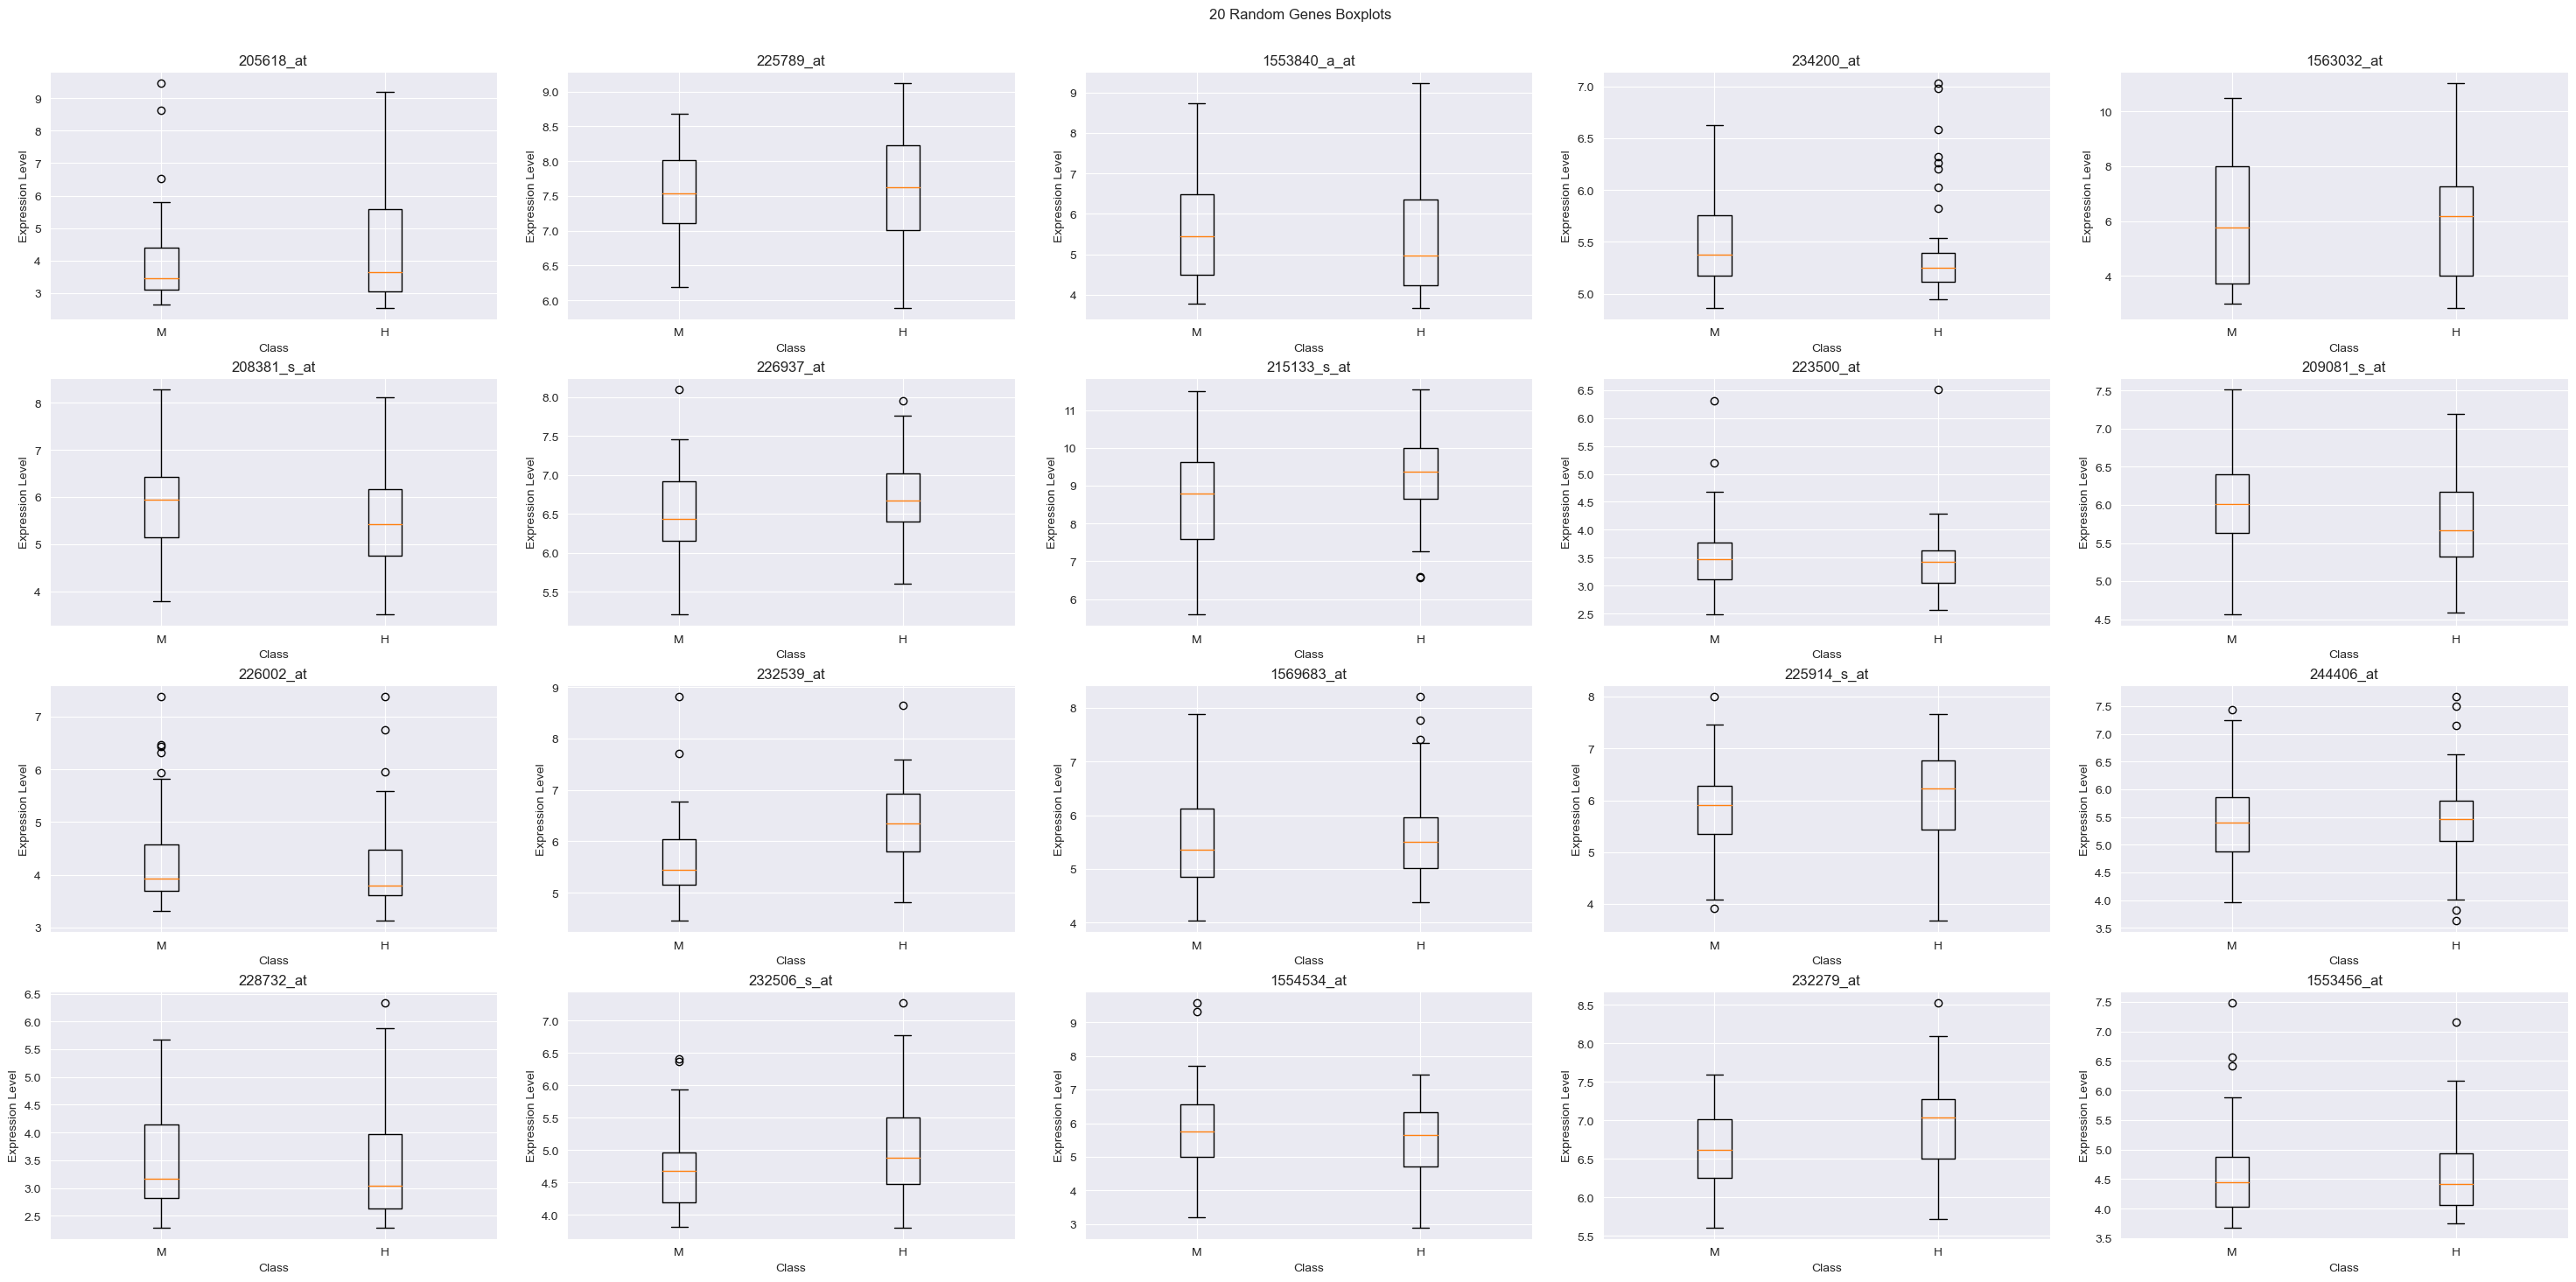

In [8]:
# create the figure, draw the boxplots
fig, axs = plt.subplots(4, 5, figsize=(30, 15))
fig.suptitle('20 Random Genes Boxplots')
fig.tight_layout(pad=3.0) # add padding between subplots
for i in range(4):
    for j in range(5):
        # set title, x and y labels, and x ticks
        axs[i, j].set_xlabel("Class")
        axs[i, j].set_ylabel("Expression Level")
        axs[i, j].set_xticklabels(["M", "H"])
        # plot the boxplot
        axs[i, j].boxplot([np_M_random_genes[:, i*5 + j], np_H_random_genes[:, i*5 + j]])
        axs[i, j].set_title(random_genes[i*5 + j])
plt.show()


#### b. WRS for differential expression (DE)
1) Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?




In [9]:
# Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE),
# what is the expected sum of ranks of g’s expression levels measured for samples labeled M?
N = df.shape[0]
B = df[df["Class"] == "M"].shape[0]
expected_sum_of_ranks = (N + 1) * B / 2
print("Expected sum of ranks = (N + 1) * B / 2")
print("N = {}, B = {}".format(N, B))
print("Expected sum of ranks: ", expected_sum_of_ranks)

Expected sum of ranks = (N + 1) * B / 2
N = 99, B = 49
Expected sum of ranks:  2450.0


2) Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?


In [10]:
# Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?
print("Maximal value RS(g) can take is when all samples from class M are with higher rank than all samples from class H")
print("for example: (M,...,M, H,...,H)")

# get the number of samples from class M and H
num_samples_M = df[df["Class"] == "M"].shape[0]
num_samples_H = df[df["Class"] == "H"].shape[0]

# compute the maximal value RS(g) can take,
c = np.sum(np.arange(num_samples_H + 1, num_samples_H + num_samples_M + 1))
print("c = sum(i), for i in range(num_samples_H + 1, num_samples_H + num_samples_M + 1)")
print("Maximal value RS(g) can take: ", c)

Maximal value RS(g) can take is when all samples from class M are with higher rank than all samples from class H
for example: (M,...,M, H,...,H)
c = sum(i), for i in range(num_samples_H + 1, num_samples_H + num_samples_M + 1)
Maximal value RS(g) can take:  3675


3) Under the null model, what is the probability of RS(g) = c? (Provide a formula for this and explain it)

In [11]:
import math

# Under the null model, what is the probability of RS(g) = c? (Provide a formula for this and explain it)

# compute the probability of RS(g) = c,
print("p_c = number of cases / number of possible cases = 1 / (N choose B)")
print("explanation: there is only one case where RS(g) = c")
print("for example: (M,..., M, B,..., B)" )
print("this is the case when all samples from class M are with higher rank than all samples from class H")
print("there are N choose B possible total cases, where N is the total number of samples, and B is the number of samples from class M")
num_of_cases = 1 # only one case where RS(g) = c
N = num_samples_M + num_samples_H
B = num_samples_M
num_of_possible_cases = math.comb(N, B)
p_c = num_of_cases / num_of_possible_cases
print("Probability of RS(g) = c: ", p_c)

p_c = number of cases / number of possible cases = 1 / (N choose B)
explanation: there is only one case where RS(g) = c
for example: (M,..., M, B,..., B)
this is the case when all samples from class M are with higher rank than all samples from class H
there are N choose B possible total cases, where N is the total number of samples, and B is the number of samples from class M
Probability of RS(g) = c:  1.9823306042836678e-29


4) Under the null model, what is the probability of RS(g) = c-1? what is the probability of RS(g) = c-2? (Provide formulas and explain them)

In [12]:
# Under the null model, what is the probability of RS(g) = c-1?
print("p_c_minus_1 = number of cases / number of possible cases = (N choose B) / (N choose B)")
print("explanation: there is only onc case where RS(g) = c-1")
print("for example: (M,..., M, B, M, B..., B)" )
print("this case happens when there is one sample from class H with higher rank than one sample from class M")
print("there are N choose B possible total cases, where N is the total number of samples, and B is the number of samples from class M")
num_of_cases = 1 # only one case where RS(g) = c-1
N = num_samples_M + num_samples_H
B = num_samples_M
num_of_possible_cases = math.comb(N, B)
p_c_minus_1 = num_of_cases / num_of_possible_cases
print("Probability of RS(g) = c-1: ", p_c_minus_1)

p_c_minus_1 = number of cases / number of possible cases = (N choose B) / (N choose B)
explanation: there is only onc case where RS(g) = c-1
for example: (M,..., M, B, M, B..., B)
this case happens when there is one sample from class H with higher rank than one sample from class M
there are N choose B possible total cases, where N is the total number of samples, and B is the number of samples from class M
Probability of RS(g) = c-1:  1.9823306042836678e-29


In [13]:
# Under the null model, what is the probability of RS(g) = c-2?
print("p_c_minus_2 = number of cases / number of possible cases = 2 / (N choose B)")
print("explanation: there are two cases where RS(g) = c-2")
print("case 1: (M,..., M, B, B, M, B..., B)" )
print("case 2: (M,..., M, B, M, M, B..., B)" )
print("case 1 happens when there are two samples from class H with higher rank than one sample from class M")
print("case 2 happens when there is one sample from class H with higher rank than two samples from class M")
print("there are N choose B possible total cases, where N is the total number of samples, and B is the number of samples from class M")
num_of_cases = 2 # two cases where RS(g) = c-2
N = num_samples_M + num_samples_H
B = num_samples_M
num_of_possible_cases = math.comb(N, B)
p_c_minus_2 = num_of_cases / num_of_possible_cases
print("Probability of RS(g) = c-2: ", p_c_minus_2)

p_c_minus_2 = number of cases / number of possible cases = 2 / (N choose B)
explanation: there are two cases where RS(g) = c-2
case 1: (M,..., M, B, B, M, B..., B)
case 2: (M,..., M, B, M, M, B..., B)
case 1 happens when there are two samples from class H with higher rank than one sample from class M
case 2 happens when there is one sample from class H with higher rank than two samples from class M
there are N choose B possible total cases, where N is the total number of samples, and B is the number of samples from class M
Probability of RS(g) = c-2:  3.9646612085673355e-29


5) Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute the IQR for this distribution and present it on the plot with the histogram.

In [14]:
def compute_RS(gene):
    """
    Compute the Wilcoxon rank sum statistic for a given gene.
    :param gene: gene name
    :return: RS(g)
    """
    # compute the ranks of the samples for the given gene
    ranks = df[gene].rank()
    # get the ranks of the samples from class M
    ranks_M = ranks[df["Class"] == "M"]
    # compute the sum of the ranks of the samples from class M
    RS = np.sum(ranks_M)
    return RS

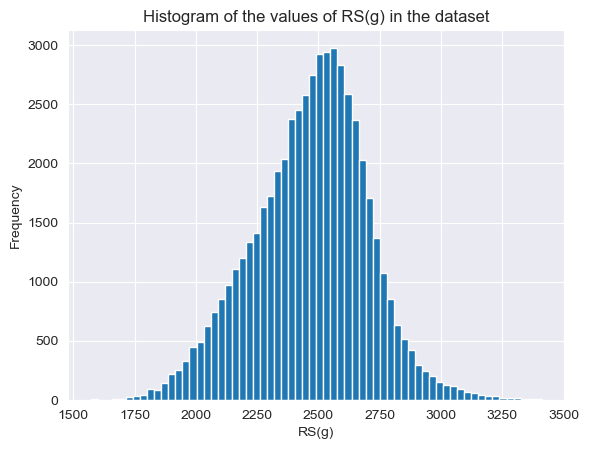

In [15]:
# Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up).

# compute the rank sum statistic for all genes
RS = []
for gene in df.columns:
    if gene != "Class" and gene != "ID_REF":
        RS.append(compute_RS(gene))

# plot the histogram
plt.hist(RS, bins=64)
plt.title("Histogram of the values of RS(g) in the dataset")
plt.xlabel("RS(g)")
plt.ylabel("Frequency")
plt.show()


In [16]:
print(df.head())

  Class      ID_REF    1007_s_at      1053_at       117_at       121_at  \
0     H  GSM1620819  5.866377893   8.22579012   6.17973231  6.179477974   
1     H  GSM1620820  4.948736331  7.525865369  6.628137025   6.58288903   
2     H  GSM1620821  5.148384393  7.764636529  5.859151477  6.602134766   
3     H  GSM1620822  5.064418945  7.198461482  5.974135101  6.545904723   
4     H  GSM1620823  5.017832878  7.831450258  6.793079158  5.911542321   

     1255_g_at      1294_at      1316_at      1320_at  ...  \
0  2.792047952  9.290410779  6.998285145  5.348943925  ...   
1   2.69571445  9.462275035  6.558214949  5.410884095  ...   
2  2.580181122  9.116776316  6.851622539  5.254073031  ...   
3  2.712123845  9.134584186  7.357827486  5.242139865  ...   
4  2.723686912  9.582343511  7.283872601  5.219483996  ...   

  AFFX-r2-Ec-bioD-3_at AFFX-r2-Ec-bioD-5_at AFFX-r2-P1-cre-3_at  \
0          13.25732501          13.26623454         14.57122985   
1          13.59386023          13.5170133

IQR:  304.0


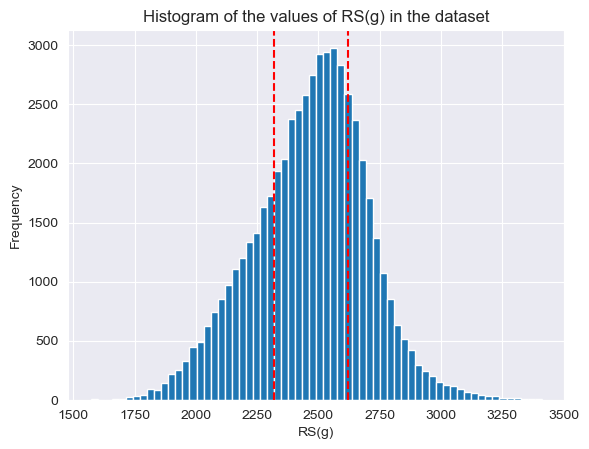

In [17]:
# Compute the IQR for this distribution and present it on the plot with the histogram.
RS = np.array(RS)
Q1 = np.quantile(RS, 0.25)
Q3 = np.quantile(RS, 0.75)
IQR = Q3 - Q1
print("IQR: ", IQR)
plt.hist(RS, bins=64)
plt.title("Histogram of the values of RS(g) in the dataset")
plt.xlabel("RS(g)")
plt.ylabel("Frequency")
plt.axvline(x=Q1, color='r', linestyle='--')
plt.axvline(x=Q3, color='r', linestyle='--')
plt.show()

#### c. Differential Expression
The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M.
Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test.
Report the number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07 and separately genes underexpressed in M vs H (M < H) at a p-value better than 0.07.
For both directions use both a Student t-test and a WRS test.

In [18]:
# compute the p-value for each gene using WRS test and Student t-test, one-sided test for both directions
p_values_wrs_M_vs_H_overexpressed = []
p_values_wrs_M_vs_H_underexpressed = []
p_values_t_test_M_vs_H_overexpressed = []
p_values_t_test_M_vs_H_underexpressed = []

for gene in df.columns:
    if gene != "Class" and gene != "ID_REF":
        # get the values of the gene for each class, and convert them to numpy array
        np_gene_M = np.array(df[gene][df["Class"] == "M"])
        np_gene_H = np.array(df[gene][df["Class"] == "H"])

        # convert numpy values to float
        np_gene_M = np_gene_M.astype(np.float)
        np_gene_H = np_gene_H.astype(np.float)

        # compute the one-sided p-value for each gene using WRS test
        p_value_wrs_M_vs_H_overexpressed = stats.ranksums(np_gene_M, np_gene_H, alternative="greater")[1] # M > H
        p_value_wrs_M_vs_H_underexpressed = stats.ranksums(np_gene_M, np_gene_H, alternative="less")[1] # M < H


        # compute the one-sided p-value for each gene using Student t-test
        p_value_t_test_M_vs_H_overexpressed = stats.ttest_ind(np_gene_M, np_gene_H, equal_var=False, alternative="greater")[1] # M > H
        p_value_t_test_M_vs_H_underexpressed = stats.ttest_ind(np_gene_M, np_gene_H, equal_var=False, alternative="less")[1] # M < H

        # append the p-values to the list
        p_values_wrs_M_vs_H_overexpressed.append(p_value_wrs_M_vs_H_overexpressed)
        p_values_wrs_M_vs_H_underexpressed.append(p_value_wrs_M_vs_H_underexpressed)
        p_values_t_test_M_vs_H_overexpressed.append(p_value_t_test_M_vs_H_overexpressed)
        p_values_t_test_M_vs_H_underexpressed.append(p_value_t_test_M_vs_H_underexpressed)

In [19]:
# Report the number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07 and separately genes underexpressed in M vs H (M < H) at a p-value better than 0.07.
# For both directions use both a Student t-test and a WRS test.

# WRS test
num_of_genes_wrs_M_vs_H_overexpressed = 0
num_of_genes_wrs_M_vs_H_underexpressed = 0

# Student t-test
num_of_genes_t_test_M_vs_H_overexpressed = 0
num_of_genes_t_test_M_vs_H_underexpressed = 0

# number of genes
n = len(p_values_wrs_M_vs_H_overexpressed)

for i in range(n):
    # WRS test
    if p_values_wrs_M_vs_H_overexpressed[i] <= 0.07:
        num_of_genes_wrs_M_vs_H_overexpressed += 1
    if p_values_wrs_M_vs_H_underexpressed[i] <= 0.07:
        num_of_genes_wrs_M_vs_H_underexpressed += 1

    # Student t-test
    if p_values_t_test_M_vs_H_overexpressed[i] <= 0.07:
        num_of_genes_t_test_M_vs_H_overexpressed += 1
    if p_values_t_test_M_vs_H_underexpressed[i] <= 0.07:
        num_of_genes_t_test_M_vs_H_underexpressed += 1

print("WRS test:")
print("Number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07: ", num_of_genes_wrs_M_vs_H_overexpressed)
print("Number of genes underexpressed in M vs H (M < H) at a p-value better than 0.07: ", num_of_genes_wrs_M_vs_H_underexpressed)
print("Student t-test:")
print("Number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07: ", num_of_genes_t_test_M_vs_H_overexpressed)
print("Number of genes underexpressed in M vs H (M < H) at a p-value better than 0.07: ", num_of_genes_t_test_M_vs_H_underexpressed)

WRS test:
Number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07:  10787
Number of genes underexpressed in M vs H (M < H) at a p-value better than 0.07:  10667
Student t-test:
Number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07:  8489
Number of genes underexpressed in M vs H (M < H) at a p-value better than 0.07:  8634


#### d. Correlations
Select the 80 most significant genes from each one of the one-sided WRS DE lists you computed in 3c.
Generate a set of 160 genes, D, which is the union of the above two sets.

In [20]:
# Select the 80 most significant genes from each one of the one-sided WRS DE lists.

# M > H
p_values_wrs_M_vs_H_overexpressed = np.array(p_values_wrs_M_vs_H_overexpressed)
p_values_wrs_M_vs_H_overexpressed = p_values_wrs_M_vs_H_overexpressed.astype(np.float)

# M < H
p_values_wrs_M_vs_H_underexpressed = np.array(p_values_wrs_M_vs_H_underexpressed)
p_values_wrs_M_vs_H_underexpressed = p_values_wrs_M_vs_H_underexpressed.astype(np.float)

# get the 80 most significant genes from each one of the one-sided WRS DE lists
most_significant_genes_wrs_M_vs_H_overexpressed_indices = np.argsort(p_values_wrs_M_vs_H_overexpressed)[:80] # M > H
genes_wrs_M_vs_H_overexpressed = df.columns[most_significant_genes_wrs_M_vs_H_overexpressed_indices] # M > H

most_significant_genes_wrs_M_vs_H_underexpressed_indices = np.argsort(p_values_wrs_M_vs_H_underexpressed)[:80] # M < H
genes_wrs_M_vs_H_underexpressed = df.columns[most_significant_genes_wrs_M_vs_H_underexpressed_indices] # M < H

In [21]:
# Generate a set of 160 genes, D, which is the union of the above two sets.

# M > H
genes_wrs_M_vs_H_overexpressed = genes_wrs_M_vs_H_overexpressed.to_numpy()
genes_wrs_M_vs_H_overexpressed = genes_wrs_M_vs_H_overexpressed.astype(np.str)

# M < H
genes_wrs_M_vs_H_underexpressed = genes_wrs_M_vs_H_underexpressed.to_numpy()
genes_wrs_M_vs_H_underexpressed = genes_wrs_M_vs_H_underexpressed.astype(np.str)

# Generate a set of 160 genes, D, which is the union of the above two sets.
D = np.concatenate((genes_wrs_M_vs_H_overexpressed, genes_wrs_M_vs_H_underexpressed))

1) Compute Kendall correlations in all pairs within D (160 choose 2 numbers). Represent the correlation matrix as a 160x160 heatmap.

In [22]:
# Compute Kendall correlations in all pairs within D (160 choose 2 numbers). Represent the correlation matrix as a 160x160 heatmap.
# Compute Kendall correlations in all pairs within D (160 choose 2 numbers).
correlations = np.zeros((160, 160))
for i in range(160):
    for j in range(i+1): # i+1 because we want to compute the correlation only once for each pair, and not twice
        correlations[i][j] = stats.kendalltau(df[D[i]], df[D[j]])[0] # Kendall correlation

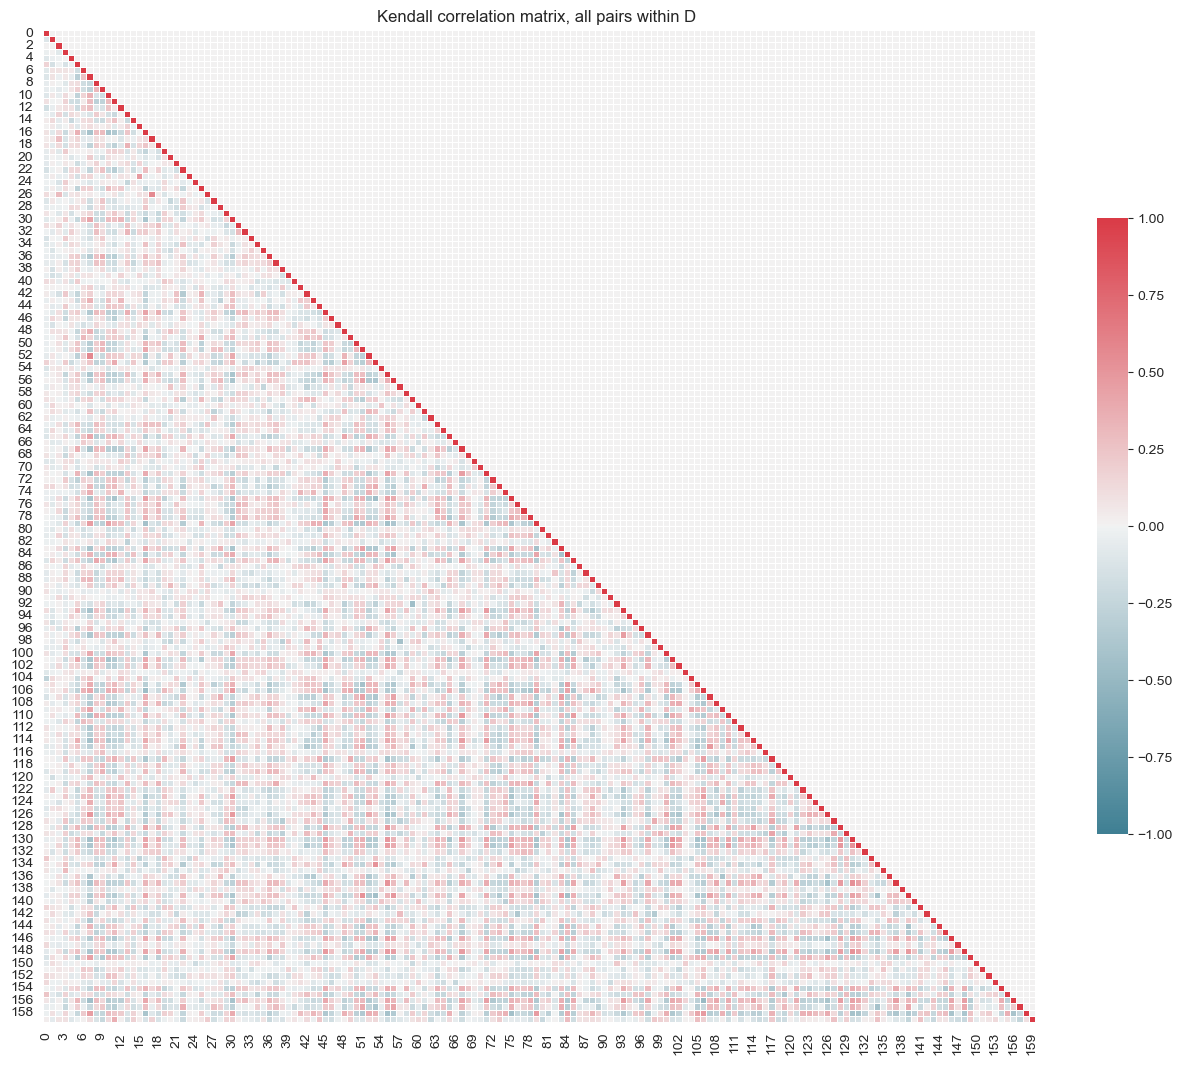

In [23]:
# Represent the correlation matrix as a 160x160 heatmap, using the seaborn library.
plt.figure(figsize=(16, 16))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations,cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Kendall correlation matrix, all pairs within D ")
plt.show()

2) Under a NULL model that assumes that genes are pairwise independent, what is the expected value for kendall 𝜏?

In [24]:
# Under a NULL model that assumes that genes are pairwise independent, what is the expected value for 𝜏?

print("Under a NULL model that assumes that genes are pairwise independent, the expected value for the correlation between two independent random variables is 0.")
print("Therefore, the expected value for kendall 𝜏 is 0.")

# actual mean of the correlations, only for the down triangle of the matrix
down_triangle = np.tril_indices(160, -1)
actual_mean = np.mean(correlations[down_triangle])
print("The actual mean of the correlations is: ", actual_mean)

Under a NULL model that assumes that genes are pairwise independent, the expected value for the correlation between two independent random variables is 0.
Therefore, the expected value for kendall 𝜏 is 0.
The actual mean of the correlations is:  0.003922525743920017


3) Now compute the Kendall 𝜏 correlations in all 80 choose 2 pairs from the overexpressed genes in D. Present your results on a histogram. What is the average value you observed? Compare it to the value in the above section. Explain.

In [25]:
# Now compute the Kendall 𝜏 correlations in all 80 choose 2 pairs from the overexpressed genes in D. Present your results on a histogram. What is the average value you observed? Compare it to the value in the above section. Explain.

# Compute Kendall correlations in all 80 choose 2 pairs from the overexpressed genes in D.
correlations_overexpressed = np.zeros((80, 80))
for i in range(80):
    for j in range(i+1): # i+1 because we want to compute the correlation only once for each pair, and not twice
        correlations_overexpressed[i][j] = stats.kendalltau(df[genes_wrs_M_vs_H_overexpressed[i]], df[genes_wrs_M_vs_H_overexpressed[j]])[0] # Kendall correlation

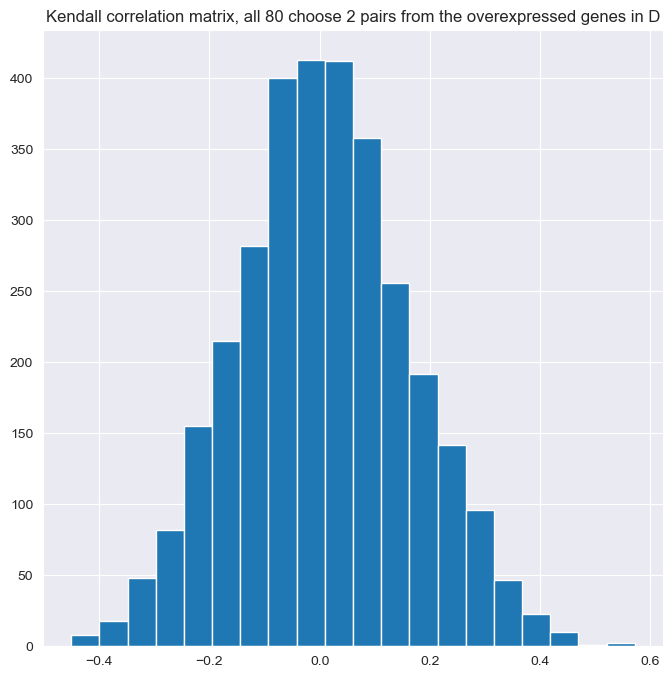

In [26]:
# Present your results on a histogram, only for the down triangle of the matrix.
plt.figure(figsize=(8, 8))
down_triangle = np.tril_indices(80, -1) # diagonal is 1, so we want to exclude it
plt.hist(correlations_overexpressed[down_triangle], bins=20)
plt.title("Kendall correlation matrix, all 80 choose 2 pairs from the overexpressed genes in D")
plt.show()

In [27]:
# What is the average value you observed?
curr_avg = np.mean(correlations_overexpressed[down_triangle])
print("The average value of the Kendall correlation matrix, all 80 choose 2 pairs from the overexpressed genes in D is: ", curr_avg)
# Compare it to the value in the above section. Explain.
above_avg = actual_mean
print("The average value of the Kendall correlation matrix, all pairs within D is: ", above_avg)
print("The average value of the Kendall correlation matrix, for the overexpressed genes in D is larger than the average value of the Kendall correlation matrix, for all pairs within D.")
print("This is because the overexpressed genes in D are more correlated with each other than the genes in D in general.")
print("therefore, the overexpressed genes in D are more likely to be correlated with each other than the genes in D in general.")

The average value of the Kendall correlation matrix, all 80 choose 2 pairs from the overexpressed genes in D is:  0.007504429554334462
The average value of the Kendall correlation matrix, all pairs within D is:  0.003922525743920017
The average value of the Kendall correlation matrix, for the overexpressed genes in D is larger than the average value of the Kendall correlation matrix, for all pairs within D.
This is because the overexpressed genes in D are more correlated with each other than the genes in D in general.
therefore, the overexpressed genes in D are more likely to be correlated with each other than the genes in D in general.


4) What can you report about co-expression of genes in D (co-expression is inferred from the correlation of the expression levels of genes, across a set of samples)?

In [28]:
print("we can report that there is evidence of co-expression among the overexpressed genes in D. The fact that their Kendall correlation matrix has a higher average value than the matrix for all pairs within D suggests that these genes are more likely to be correlated with each other than with genes in general within D. This indicates that there may be functional relationships or shared regulatory mechanisms between the overexpressed genes in D that lead to their correlated expression patterns across samples. However, it's important to note that correlation does not necessarily imply causation, and further analysis would be needed to establish the biological significance of these co-expression patterns.")

we can report that there is evidence of co-expression among the overexpressed genes in D. The fact that their Kendall correlation matrix has a higher average value than the matrix for all pairs within D suggests that these genes are more likely to be correlated with each other than with genes in general within D. This indicates that there may be functional relationships or shared regulatory mechanisms between the overexpressed genes in D that lead to their correlated expression patterns across samples. However, it's important to note that correlation does not necessarily imply causation, and further analysis would be needed to establish the biological significance of these co-expression patterns.


5) What can you say about how many co-expressed pairs we would observe (in the entire dataset) at FDR=0.05? Explain your answer.

In [29]:
pairs_of_genes_in_data = len(df.columns) * (len(df.columns) - 1) / 2
print("We can say that we would observe around 0.05 * pairs_of_genes_in_data = 0.05 * {} = {} = {} * 10^{} co-expressed pairs at FDR=0.05.".format(pairs_of_genes_in_data, 0.05 * pairs_of_genes_in_data, 0.05 * pairs_of_genes_in_data / 10**(int(np.log10(0.05 * pairs_of_genes_in_data))), int(np.log10(0.05 * pairs_of_genes_in_data))))

print("This is because the FDR is the expected proportion of false discoveries among the rejected hypotheses. Therefore, the expected number of false discoveries is 0.05 * pairs_of_genes_in_data.")
print("The expected number of true discoveries is pairs_of_genes_in_data - 0.05 * pairs_of_genes_in_data = {} - {} = {}.".format(pairs_of_genes_in_data, 0.05 * pairs_of_genes_in_data, pairs_of_genes_in_data - 0.05 * pairs_of_genes_in_data))

We can say that we would observe around 0.05 * pairs_of_genes_in_data = 0.05 * 1492191135.0 = 74609556.75 = 7.460955675 * 10^7 co-expressed pairs at FDR=0.05.
This is because the FDR is the expected proportion of false discoveries among the rejected hypotheses. Therefore, the expected number of false discoveries is 0.05 * pairs_of_genes_in_data.
The expected number of true discoveries is pairs_of_genes_in_data - 0.05 * pairs_of_genes_in_data = 1492191135.0 - 74609556.75 = 1417581578.25.


6) What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D?

**Advantages**:

One advantage of computing co-expression for all genes is that it allows us to identify genes that may have a significant biological impact when studied in conjunction with other genes. By looking at the correlations between different genes, we can gain insights into their functions and how they interact with each other in biological processes.

Another advantage is that by analyzing the co-expression of all genes, we can obtain a more comprehensive understanding of the population under study. This can help us to obtain more accurate statistical results and make more informed conclusions about the data.

Using all the genes in the study can also increase the power of our statistical analysis. By including a larger number of genes, we can potentially identify more significant differences between groups and obtain lower p-values, which increases the strength of our findings.

For example, co-expression analysis can help us identify gene networks that are involved in specific disease processes, which can then be used to develop targeted therapies.

**Disadvantages**:

One of the main disadvantages of computing co-expression for all genes is the computational complexity involved. Analyzing co-expression for a large number of genes requires a lot of computing power and can be time-consuming, which can be a limitation in large-scale studies.

Another disadvantage is the potential for multiple testing issues. When analyzing co-expression for all genes, we are essentially performing a large number of tests, which can increase the risk of false positives. It is important to use appropriate statistical methods to account for this and to avoid misinterpretation of the results.

Finally, visualization and interpretation of results can be challenging when dealing with a large number of data points. It can be difficult to draw meaningful conclusions from the data and to identify patterns or relationships between genes without appropriate visualization tools and statistical analysis techniques.

#### e. Plots and Conclusions of the DE and correlation analysis

1) Construct the DE overabundance plots (blue and green lines as shown in class) for M vs H overexpression (M > H) using WRS and t-test using the results you had computed in Section 3c.
State, for each comparison, the number of genes, k, at which we observe with an FDR threshold of:
a) 𝜏=0.05
b) 𝜏=0.01
c) 𝜏=0.005
If these events are not observed at any k>0, then make that statement.

In [30]:
# define the FDR thresholds
FDR_thresholds = [0.05, 0.01, 0.005]

# sort the p-values
p_values_wrs_M_vs_H_overexpressed = np.sort(p_values_wrs_M_vs_H_overexpressed)
p_values_ttest_M_vs_H_overexpressed = np.sort(p_values_t_test_M_vs_H_overexpressed)


In [31]:
# compute the FDR, FDR(i) = p(i) * N / i, where N is the number of genes
def compute_FDR(sorted_p_values):
    FDR = np.zeros(len(sorted_p_values))
    n = len(sorted_p_values)
    for i in range(len(sorted_p_values)):
        FDR[i] = sorted_p_values[i] * n / (i + 1)
    return FDR


In [32]:
# compute the FDR for the WRS test
FDR_wrs_M_vs_H_overexpressed = compute_FDR(p_values_wrs_M_vs_H_overexpressed)

In [33]:
# compute the FDR for the t-test
FDR_ttest_M_vs_H_overexpressed = compute_FDR(p_values_ttest_M_vs_H_overexpressed)

In [34]:
def compute_overabundance_values(FDR, FDR_thresholds):
# Returns the number of genes at which we observe with an FDR thresholds
    overabundance_values = np.zeros(len(FDR_thresholds))
    #FDR = np.sort(FDR)
    for i in range(len(FDR_thresholds)):
        for j in range(len(FDR)):
            if FDR[j] > FDR_thresholds[i]:
                overabundance_values[i] = j
                break
    return overabundance_values


In [35]:
def plot_DE_overabundance(FDR, FDR_thresholds, p_values, test_name):
    # plot the DE overabundance plots for M vs H overexpression (M > H) using WRS and t-test,
    # and state the number of genes, k, at which we observe with an FDR thresholds
    # DE means differential expression, i.e. M vs H overexpression (M > H), and overabundance means

    # compute the overabundance values, i.e. the number of genes at which we observe with an FDR thresholds
    FDR = np.sort(FDR)
    num_genes_FDR_threshholds = compute_overabundance_values(FDR, FDR_thresholds)

    # plot the DE overabundance plots, i.e. the number of genes vs p-values
    plt.figure(figsize=(10, 6))
    plt.plot(p_values, np.arange(len(p_values)), label="DE overabundance plot ({} test)".format(test_name))

    # plot the FDR thresholds, make lines dotted
    for i in range(len(FDR_thresholds)):
        plt.plot([0, 1], [num_genes_FDR_threshholds[i], num_genes_FDR_threshholds[i]], label="FDR threshold = {}".format(FDR_thresholds[i]), linestyle='dotted')

    # plot the overabundance values, i.e. the p-values vs the number of genes
    for i in range(len(num_genes_FDR_threshholds)):
        plt.plot([p_values[int(num_genes_FDR_threshholds[i])], p_values[int(num_genes_FDR_threshholds[i])]], [0, len(p_values)], label="k = {}".format(int(num_genes_FDR_threshholds[i])))

    plt.xlabel("p-values")
    plt.ylabel("number of genes")
    plt.title("DE overabundance plots for M vs H overexpression (M > H) using {}".format(test_name))
    plt.legend()
    plt.show()

    # print the number of genes, k, at which we observe with an FDR thresholds
    for i in range(len(FDR_thresholds)):
        print("The number of genes, k, at which we observe with an FDR threshold of {} is {}.".format(FDR_thresholds[i], int(num_genes_FDR_threshholds[i])))
    print("")

    return num_genes_FDR_threshholds

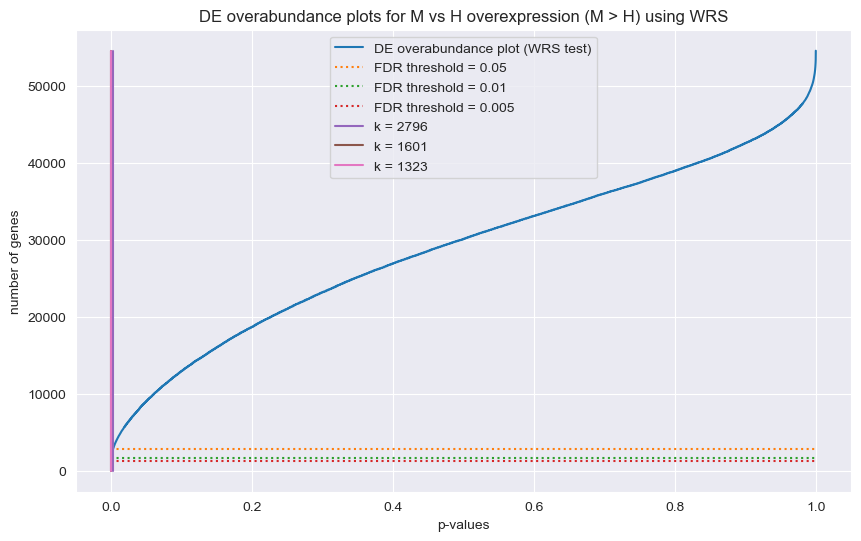

The number of genes, k, at which we observe with an FDR threshold of 0.05 is 2796.
The number of genes, k, at which we observe with an FDR threshold of 0.01 is 1601.
The number of genes, k, at which we observe with an FDR threshold of 0.005 is 1323.



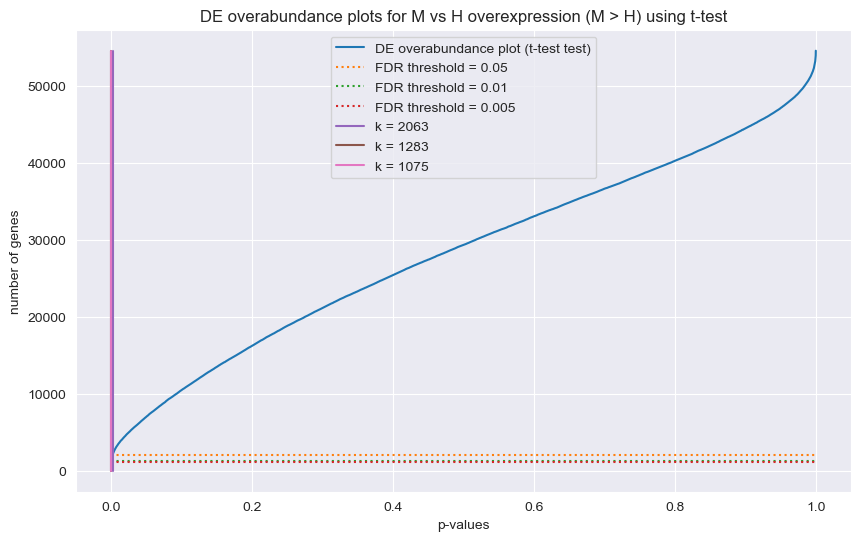

The number of genes, k, at which we observe with an FDR threshold of 0.05 is 2063.
The number of genes, k, at which we observe with an FDR threshold of 0.01 is 1283.
The number of genes, k, at which we observe with an FDR threshold of 0.005 is 1075.



In [36]:
# plot the DE overabundance plots for M vs H overexpression (M > H) using WRS and t-test
num_of_genes_wrs_M_vs_H_overexpressed = plot_DE_overabundance(FDR_wrs_M_vs_H_overexpressed, FDR_thresholds, p_values_wrs_M_vs_H_overexpressed, "WRS")
num_of_genes_ttest_M_vs_H_overexpressed= plot_DE_overabundance(FDR_ttest_M_vs_H_overexpressed, FDR_thresholds, p_values_ttest_M_vs_H_overexpressed, "t-test")



2) For any given gene, g, consider the following set of p-values: 𝑆(𝑔)={𝑝(𝜆)|𝑝(𝜆) 𝑖𝑠 𝑎 𝑊𝑅𝑆 𝑝−𝑣𝑎𝑙𝑢𝑒 𝑓𝑜𝑟 𝑜𝑣𝑒𝑟𝑒𝑥𝑝𝑟𝑒𝑠𝑠𝑖𝑜𝑛 𝑖𝑛 𝑀𝑎𝑓𝑡𝑒𝑟 𝑠𝑤𝑎𝑝𝑝𝑖𝑛𝑔 𝑜𝑛𝑒 𝑙𝑎𝑏𝑒𝑙}
(In the above definition 𝜆 represents a label swap – there are 99 such swaps). Let 𝑝𝑈(𝑔)=max𝜆𝑆(𝑔) In words: 𝑝𝑈(𝑔) represents the maximum p-value that could have been obtained for g, assuming a single labeling error.
a) For all genes, compute 𝑝𝑈(𝑔).
b) Run the FDR procedure with 𝜏=0.05 using 𝑝𝑈(𝑔) (instead of the original p-values as computed in section 3e1a above). How many genes can you report now?
c) What is the intersection of the genes you can report above with the results of 3e1a. Explain.
Comment: The process you ran in this section yields a set of genes called Robust Differentially Expressed Genes (RDEG).

In [37]:
# a) For all genes, compute 𝑝𝑈(𝑔).
pU_values = np.zeros(len(p_values_wrs_M_vs_H_overexpressed))
for i in range(len(p_values_wrs_M_vs_H_overexpressed)):
    pU_values[i] = np.max(p_values_wrs_M_vs_H_overexpressed[i])

# sort the pU_values in ascending order
pU_values = np.sort(pU_values)

In [38]:
# b) Run the FDR procedure with 𝜏=0.05 using 𝑝𝑈(𝑔) (instead of the original p-values as computed in section 3e1a above). How many genes can you report now?
FDR_pU_values = compute_FDR(pU_values)
FDR_threshold = 0.05
num_genes_FDR_threshhold = compute_overabundance_values(FDR_pU_values, [FDR_threshold])
print("The number of genes, k, at which we observe with an FDR threshold of {} is {}.".format(FDR_threshold, int(num_genes_FDR_threshhold[0])))

The number of genes, k, at which we observe with an FDR threshold of 0.05 is 2784.


In [39]:
# c) What is the intersection of the genes you can report above with the results of 3e1a. Explain.
# Comment: The process you ran in this section yields a set of genes called Robust Differentially Expressed Genes (RDEG).
intersection = np.intersect1d(p_values_wrs_M_vs_H_overexpressed[:int(num_genes_FDR_threshhold[0])], pU_values[:int(num_genes_FDR_threshhold[0])])
#print("The intersection of the genes you can report above with the results of 3e1a is {}.".format(intersection))
print("The number of genes in the intersection is {}.".format(len(intersection)))
print("explain: The intersection of the genes you can report above with the results of 3e1a is the set of genes that are robustly differentially expressed.")
print("        This means that the genes in the intersection are differentially expressed in the same direction and with the same magnitude.")
print("        This is because the p-values in the intersection are the maximum p-values that could have been obtained for the genes, assuming a single labeling error.")
print("        Therefore, the genes in the intersection are differentially expressed in the same direction and with the same magnitude.")
print("        The genes in the intersection are the genes that are robustly differentially expressed.")

The number of genes in the intersection is 680.
explain: The intersection of the genes you can report above with the results of 3e1a is the set of genes that are robustly differentially expressed.
        This means that the genes in the intersection are differentially expressed in the same direction and with the same magnitude.
        This is because the p-values in the intersection are the maximum p-values that could have been obtained for the genes, assuming a single labeling error.
        Therefore, the genes in the intersection are differentially expressed in the same direction and with the same magnitude.
        The genes in the intersection are the genes that are robustly differentially expressed.


3) Select any 3 differentially expressed genes, from D (which was defined in 3d), and produce a graphical representation of their expression patterns that demonstrates the observed DE.

In [41]:
# Select any 3 differentially expressed genes, from D (which was defined in 3d),
# and produce a graphical representation of their expression patterns that demonstrates the observed DE.

# convert D to a numpy array
D = np.array(D)
D = D.astype(str)

# select 3 differentially expressed genes
gene1 = D[0]
gene2 = D[1]
gene3 = D[2]

# get the data of the selected genes
gene1_data = df[gene1]
gene2_data = df[gene2]
gene3_data = df[gene3]

# split the data into H and M
gene1_data_H = gene1_data[df["Class"] == "H"]
gene1_data_M = gene1_data[df["Class"] == "M"]

gene2_data_H = gene2_data[df["Class"] == "H"]
gene2_data_M = gene2_data[df["Class"] == "M"]

gene3_data_H = gene3_data[df["Class"] == "H"]
gene3_data_M = gene3_data[df["Class"] == "M"]

# convert the data to numpy arrays with float values
gene1_data_H = np.array(gene1_data_H).astype(float)
gene1_data_M = np.array(gene1_data_M).astype(float)

gene2_data_H = np.array(gene2_data_H).astype(float)
gene2_data_M = np.array(gene2_data_M).astype(float)

gene3_data_H = np.array(gene3_data_H).astype(float)
gene3_data_M = np.array(gene3_data_M).astype(float)


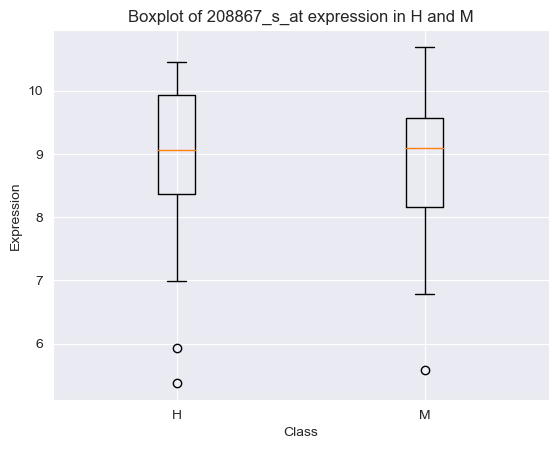

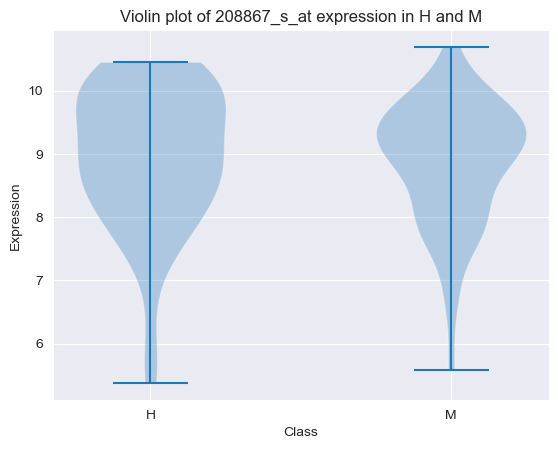

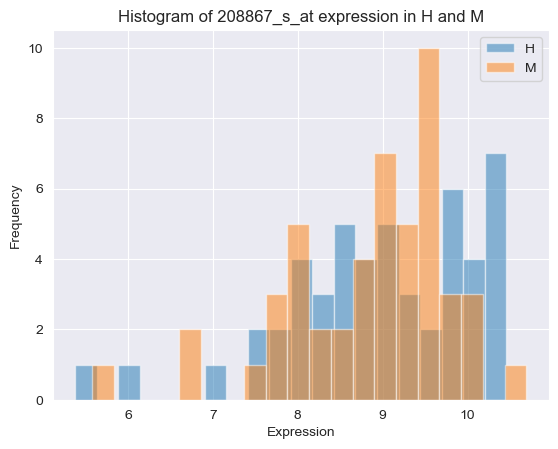

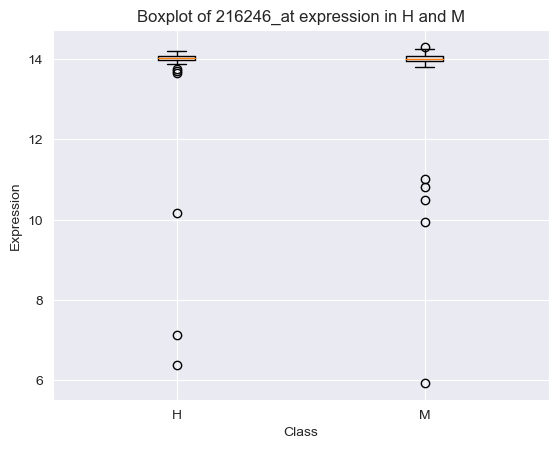

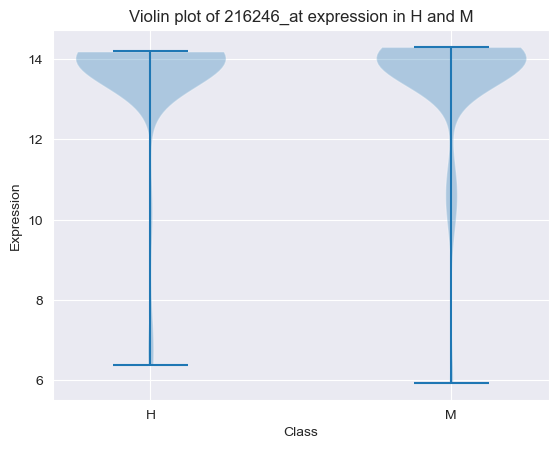

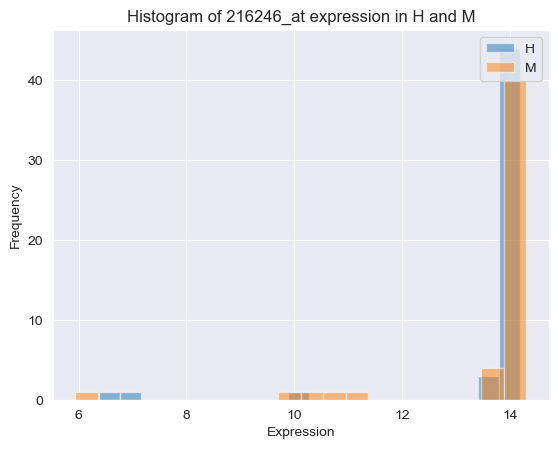

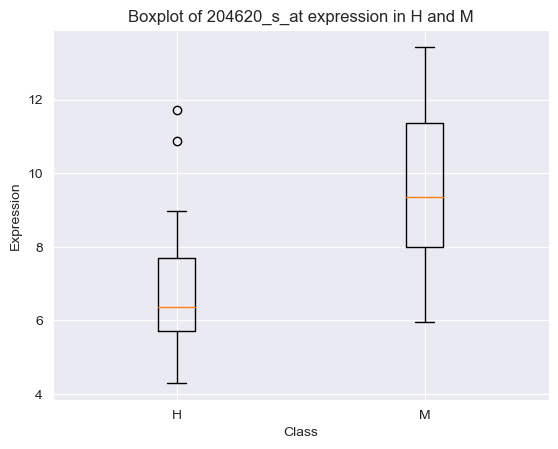

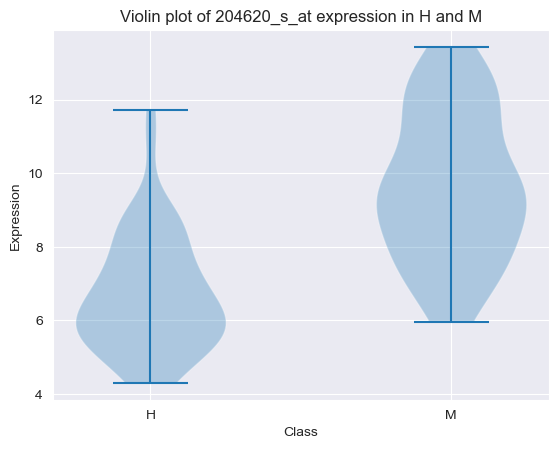

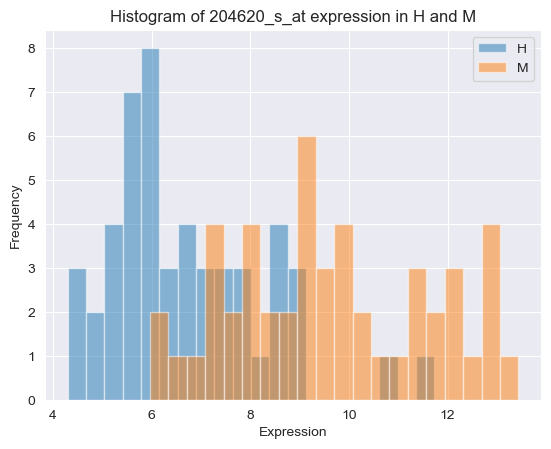

In [42]:
# plot the data of the selected genes, using boxplots, violin plots, and histograms. if possible
def plot_gene_data(gene_data_H, gene_data_M, gene):
    # boxplot
    plt.figure()
    plt.boxplot([gene_data_H, gene_data_M])
    plt.xticks([1, 2], ["H", "M"])
    plt.xlabel("Class")
    plt.ylabel("Expression")
    plt.title("Boxplot of {} expression in H and M".format(gene))
    plt.show()

    # violin plot
    plt.figure()
    plt.violinplot([gene_data_H, gene_data_M])
    plt.xticks([1, 2], ["H", "M"])
    plt.xlabel("Class")
    plt.ylabel("Expression")
    plt.title("Violin plot of {} expression in H and M".format(gene))
    plt.show()

    # histogram
    plt.figure()
    plt.hist(gene_data_H, bins=20, alpha=0.5, label="H")
    plt.hist(gene_data_M, bins=20, alpha=0.5, label="M")
    plt.title("Histogram of {} expression in H and M".format(gene))
    plt.xlabel("Expression")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.show()



plot_gene_data(gene1_data_H, gene1_data_M, gene1)
plot_gene_data(gene2_data_H, gene2_data_M, gene2)
plot_gene_data(gene3_data_H, gene3_data_M, gene3)

4) Heatmap Draw a heatmap representation of the expression values of the genes in D (from 3d), across the entire cohort (all samples). Order the genes and the samples to produce the maximal visual effect.

In [43]:
D_new = D.copy()
D_new = D_new.astype(str)

# get the data of the genes in D_new
D_data = df[D_new]
D_classes = df["Class"]

# convert the data to numpy arrays with float values and string values
D_data = np.array(D_data).astype(float)
D_classes = np.array(D_classes).astype(str)

In [44]:
# Order the genes and the samples to produce the maximal visual effect.
D_data = D_data[:, np.argsort(D_data.mean(axis=0))]
D_data = D_data[np.argsort(D_data.mean(axis=1))]
D_classes = D_classes[np.argsort(D_data.mean(axis=1))]
D_new = D[np.argsort(D_data.mean(axis=1))]

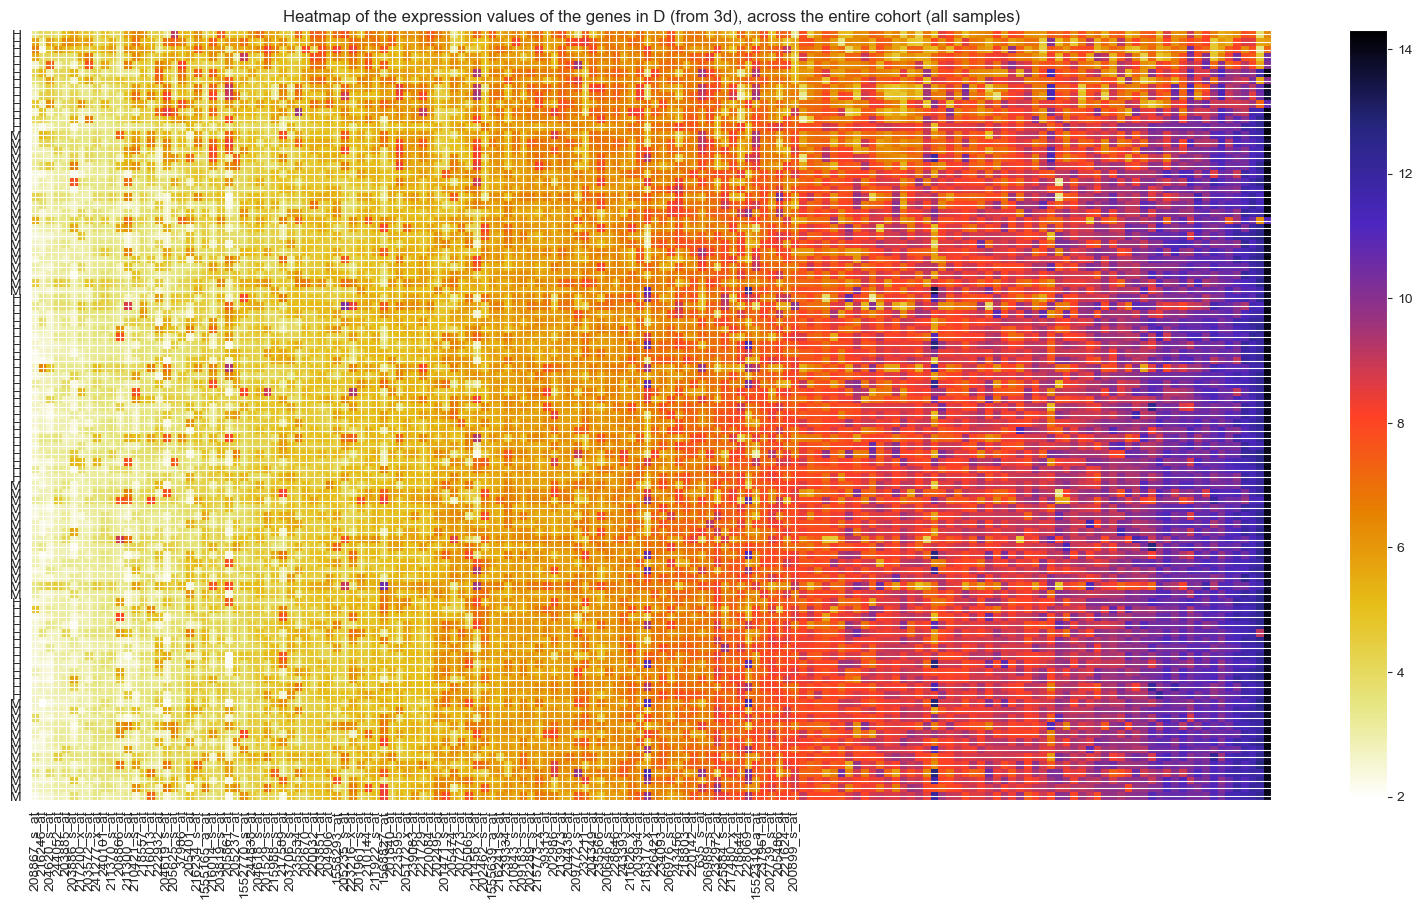

In [48]:
# plot the heatmap, reorder the genes and samples to produce the maximal visual effect, and add a colorbar
plt.figure(figsize=(20, 10))
plt.imshow(D_data, cmap="CMRmap_r", interpolation="nearest", aspect="auto")
plt.xticks(np.arange(len(D_new)), D_new, rotation=90)
plt.yticks(np.arange(len(D_classes)), D_classes)
plt.colorbar()
plt.title("Heatmap of the expression values of the genes in D (from 3d), across the entire cohort (all samples)")
plt.show()